# Generating animals with DCGAN based on LHI Animal Face dataset

Dataset from https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html

- small dataset (2k) with a lot of diverse classes (19)
- images are of medium quality (150x150)
- position on faced nicely


In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Data loading
Images are explored and processed in `Ganimals - Dataset loading and processing.ipynb` notebook.

In [13]:
INPUT_PATH = '/content/gdrive/MyDrive/ganimals/'
OUTPUT_PATH = '/content/gdrive/MyDrive/ganimals/dcgan_lhi/'

In [4]:
def load_data(path_to_npz):
  ''' Load images from numpy compressed array previously created.

  Args:
    path_to_npz - str, path to directory with file name where .npz file is located

  '''
  data = np.load(path_to_npz)
  animals = data['arr_0']
  print('Loaded: ', animals.shape)

  return animals

def preprocess_images(animals):
  ''' Preprocess images stored in array. Images are required to be normalized to [-1, 1] for generator of GAN. Shuffle the images.

  Args:
    animals - numpy array, stored images of dataset

  '''
  animals = (animals.astype('float32') - 127.5) / 127.5  # normalize the images to [-1, 1] 
  np.random.shuffle(animals) 

  return animals

In [5]:
lhi_animals = load_data(INPUT_PATH + 'lhi_animals.npz')
lhi_animals = preprocess_images(lhi_animals)

Loaded:  (2312, 80, 80, 3)


In [6]:
# TESTS DATA LOADING

def test_data_laoding(images, expected_size):

  assert images.shape[1:] == (80, 80, 3) # test img shape
  assert images.shape[0] > expected_size # test size approx

def test_normalization(images):
  assert (images <= 1).all() & (images >= -1).all(), 'Data  should be normalized and range from -1 to 1'

test_data_laoding(lhi_animals, 2000)
test_normalization(lhi_animals)

# DCGAN 

In [7]:
batch_size = 128
num_channels = 3
image_size = 80
latent_dim = 100

In [8]:
from dcgan import DCGAN, GANMonitor # load my DCGAN model

In [11]:
cbk = GANMonitor(epoch_summarize=10, latent_dim=latent_dim)

dcgan = DCGAN(latent_dim=latent_dim)
dcgan.compile()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 128)       9728      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 80, 80, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 128)       409728    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 40, 40, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 128)       409728    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 20, 20, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 128)     

In [14]:
# to save intermediate models and images to drive
os.chdir(OUTPUT_PATH)

In [15]:
dcgan.fit(lhi_animals, batch_size=128, epochs=100, callbacks=[cbk])

Epoch 1/100
19/19 [==============================] - 18s 833ms/step - d_loss: 0.4321 - g_loss: 1.3024
Epoch 2/100
19/19 [==============================] - 16s 843ms/step - d_loss: 0.2818 - g_loss: 2.7652
Epoch 3/100
19/19 [==============================] - 16s 848ms/step - d_loss: 0.2014 - g_loss: 9.6912
Epoch 4/100
19/19 [==============================] - 16s 854ms/step - d_loss: 0.1478 - g_loss: 5.8967
Epoch 5/100
19/19 [==============================] - 17s 867ms/step - d_loss: -5.2626 - g_loss: 705.7130
Epoch 6/100
19/19 [==============================] - 17s 868ms/step - d_loss: 1149.6989 - g_loss: 16329.6533
Epoch 7/100
19/19 [==============================] - 17s 896ms/step - d_loss: 35.9275 - g_loss: 139.6289
Epoch 8/100
19/19 [==============================] - 17s 902ms/step - d_loss: -0.0441 - g_loss: 203.9438
Epoch 9/100
19/19 [==============================] - 17s 892ms/step - d_loss: 25.3849 - g_loss: 65.5539
Epoch 10/100
19/19 [==============================] - ETA: 0s - 

19/19 [==============================] - 19s 997ms/step - d_loss: 3.4770 - g_loss: 34.8812
Epoch 11/100
19/19 [==============================] - 17s 883ms/step - d_loss: 0.0972 - g_loss: 58.6129
Epoch 12/100
19/19 [==============================] - 17s 889ms/step - d_loss: -0.7785 - g_loss: 109.7913
Epoch 13/100
19/19 [==============================] - 17s 894ms/step - d_loss: -1.6950 - g_loss: 183.4225
Epoch 14/100
19/19 [==============================] - 17s 891ms/step - d_loss: -2.6154 - g_loss: 276.6352
Epoch 15/100
19/19 [==============================] - 17s 891ms/step - d_loss: -4.0115 - g_loss: 401.2283
Epoch 16/100
19/19 [==============================] - 17s 892ms/step - d_loss: -6.1778 - g_loss: 637.9133
Epoch 17/100
19/19 [==============================] - 17s 890ms/step - d_loss: -9.6233 - g_loss: 1031.3511
Epoch 18/100
19/19 [==============================] - 17s 890ms/step - d_loss: 19.4212 - g_loss: 535.2234
Epoch 19/100
19/19 [==============================] - 17s 890m

19/19 [==============================] - 19s 983ms/step - d_loss: 0.9553 - g_loss: 306.5078
Epoch 21/100
19/19 [==============================] - 17s 887ms/step - d_loss: 60.7643 - g_loss: 515.8754
Epoch 22/100
19/19 [==============================] - 17s 892ms/step - d_loss: 1.5002 - g_loss: 225.3008
Epoch 23/100
19/19 [==============================] - 17s 894ms/step - d_loss: -0.6450 - g_loss: 139.3943
Epoch 24/100
19/19 [==============================] - 17s 893ms/step - d_loss: -0.8107 - g_loss: 237.5909
Epoch 25/100
19/19 [==============================] - 17s 892ms/step - d_loss: -8.9499 - g_loss: 857.1285
Epoch 26/100
19/19 [==============================] - 17s 892ms/step - d_loss: 7.9408 - g_loss: 331.5079
Epoch 27/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.7343 - g_loss: 52.6703
Epoch 28/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.4929 - g_loss: 19.0828
Epoch 29/100
19/19 [==============================] - 17s 890ms/st

19/19 [==============================] - 18s 969ms/step - d_loss: 0.1955 - g_loss: 17.0968
Epoch 31/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.1231 - g_loss: 22.1094
Epoch 32/100
19/19 [==============================] - 17s 893ms/step - d_loss: 0.1127 - g_loss: 24.8588
Epoch 33/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.0675 - g_loss: 21.7910
Epoch 34/100
19/19 [==============================] - 17s 893ms/step - d_loss: 0.0133 - g_loss: 24.1917
Epoch 35/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.0155 - g_loss: 26.0405
Epoch 36/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.0019 - g_loss: 24.2981
Epoch 37/100
19/19 [==============================] - 17s 891ms/step - d_loss: -0.0285 - g_loss: 24.9112
Epoch 38/100
19/19 [==============================] - 17s 889ms/step - d_loss: -0.0180 - g_loss: 29.0759
Epoch 39/100
19/19 [==============================] - 17s 889ms/step - d_lo

19/19 [==============================] - 19s 985ms/step - d_loss: -0.0578 - g_loss: 30.8254
Epoch 41/100
19/19 [==============================] - 17s 888ms/step - d_loss: -0.0590 - g_loss: 29.9750
Epoch 42/100
19/19 [==============================] - 17s 890ms/step - d_loss: -0.0926 - g_loss: 33.6268
Epoch 43/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1294 - g_loss: 34.3200
Epoch 44/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1243 - g_loss: 35.6707
Epoch 45/100
19/19 [==============================] - 17s 891ms/step - d_loss: -0.1488 - g_loss: 39.6983
Epoch 46/100
19/19 [==============================] - 17s 891ms/step - d_loss: -0.1913 - g_loss: 38.8381
Epoch 47/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1591 - g_loss: 39.4483
Epoch 48/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1570 - g_loss: 40.4616
Epoch 49/100
19/19 [==============================] - 17s 890ms/step

19/19 [==============================] - 19s 994ms/step - d_loss: -0.1733 - g_loss: 39.4118
Epoch 51/100
19/19 [==============================] - 17s 887ms/step - d_loss: -0.1983 - g_loss: 46.0490
Epoch 52/100
19/19 [==============================] - 17s 890ms/step - d_loss: -0.1756 - g_loss: 44.3573
Epoch 53/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1751 - g_loss: 41.6843
Epoch 54/100
19/19 [==============================] - 17s 892ms/step - d_loss: -0.1142 - g_loss: 42.8977
Epoch 55/100
19/19 [==============================] - 17s 893ms/step - d_loss: -0.0282 - g_loss: 39.8691
Epoch 56/100
19/19 [==============================] - 17s 893ms/step - d_loss: 0.2033 - g_loss: 24.9328
Epoch 57/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.3724 - g_loss: 5.7533
Epoch 58/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.1486 - g_loss: 4.6679
Epoch 59/100
19/19 [==============================] - 17s 890ms/step - d_

19/19 [==============================] - 18s 968ms/step - d_loss: 0.1140 - g_loss: 5.1641
Epoch 61/100
19/19 [==============================] - 17s 888ms/step - d_loss: 0.1072 - g_loss: 5.6496
Epoch 62/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0898 - g_loss: 5.6908
Epoch 63/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0877 - g_loss: 5.7803
Epoch 64/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.0876 - g_loss: 5.8500
Epoch 65/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0793 - g_loss: 5.9472
Epoch 66/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0813 - g_loss: 5.9961
Epoch 67/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0770 - g_loss: 5.8123
Epoch 68/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0719 - g_loss: 6.0253
Epoch 69/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.0752 

19/19 [==============================] - 19s 1s/step - d_loss: 0.0658 - g_loss: 6.1111
Epoch 71/100
19/19 [==============================] - 17s 887ms/step - d_loss: 0.0655 - g_loss: 6.2707
Epoch 72/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0708 - g_loss: 6.2150
Epoch 73/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0595 - g_loss: 6.2209
Epoch 74/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0626 - g_loss: 6.4024
Epoch 75/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.0625 - g_loss: 6.3497
Epoch 76/100
19/19 [==============================] - 17s 888ms/step - d_loss: 0.0608 - g_loss: 6.4039
Epoch 77/100
19/19 [==============================] - 17s 888ms/step - d_loss: 0.0656 - g_loss: 6.2629
Epoch 78/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.0567 - g_loss: 5.9799
Epoch 79/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0563 - g

19/19 [==============================] - 18s 969ms/step - d_loss: 0.0610 - g_loss: 6.2329
Epoch 81/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.0612 - g_loss: 6.1111
Epoch 82/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0649 - g_loss: 6.1603
Epoch 83/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.0698 - g_loss: 5.6384
Epoch 84/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0732 - g_loss: 6.2146
Epoch 85/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0739 - g_loss: 6.1162
Epoch 86/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.0811 - g_loss: 5.5791
Epoch 87/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.0787 - g_loss: 5.7070
Epoch 88/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.1205 - g_loss: 5.3611
Epoch 89/100
19/19 [==============================] - 17s 890ms/step - d_loss: 0.1518 

19/19 [==============================] - 19s 1s/step - d_loss: 0.1271 - g_loss: 4.4210
Epoch 91/100
19/19 [==============================] - 17s 887ms/step - d_loss: 0.1190 - g_loss: 4.5024
Epoch 92/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.1236 - g_loss: 4.6543
Epoch 93/100
19/19 [==============================] - 17s 892ms/step - d_loss: 0.1168 - g_loss: 4.6645
Epoch 94/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.1400 - g_loss: 4.4758
Epoch 95/100
19/19 [==============================] - 17s 891ms/step - d_loss: 0.1399 - g_loss: 4.8199
Epoch 96/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.1484 - g_loss: 5.1311
Epoch 97/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.1303 - g_loss: 5.2778
Epoch 98/100
19/19 [==============================] - 17s 889ms/step - d_loss: 0.1146 - g_loss: 4.7825
Epoch 99/100
19/19 [==============================] - 17s 888ms/step - d_loss: 0.1162 - g

19/19 [==============================] - 18s 967ms/step - d_loss: 0.1312 - g_loss: 5.1583


# Evaluatiom

## Load model

In [16]:
import tensorflow as tf
from keras.models import load_model
import matplotlib.image as mpimg

In [17]:
generator_dcgan = load_model(OUTPUT_PATH + 'generator_model_100.h5') # pick best performing model based on saved plots while training

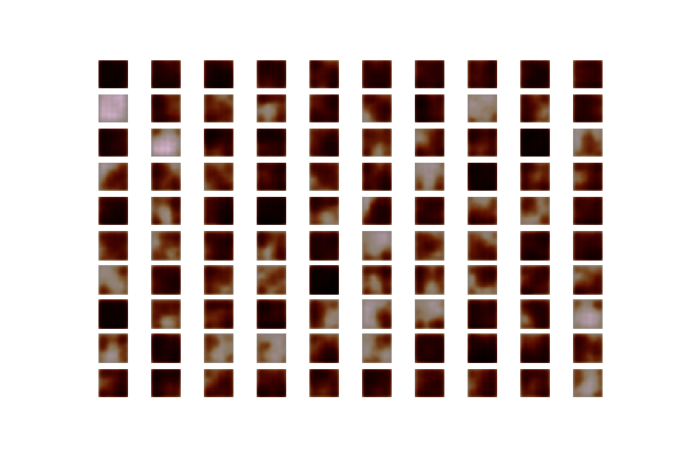

In [18]:
img = mpimg.imread(OUTPUT_PATH + 'generated_plot_e100.png')

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

# Notes
At my first implementation (based on https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/) the model keept entering failure mode with discriminator loss of 0 (no more learning happens, there are no more loss gradients flowing, so weights of D and G are not modified). Approaches tried:
- change learning rate of Adam optimizer
- increase beta parameter in Adam optimizer to 0.9
- get rid of sigmoid output layer of discriminator and instead compute binary cross entropy from logits (can calculate just output from fully connected layer)

Later in the project I implemented DCGAN in keras style (current model in notebook) with slight changes and training the model with it yielded some results. However, as can be seen, training for 100 epochs still results in really blurry images with no details whatsover. That's why I further dropped this dataset in favor of the other ones and dont explore latent space here.

Dataset LHI was really nicely aligned with 21 classes (-2 that I excluded: human faces and neutral) BUT **it was a rather small dataset of 2k images** which may be not enough training examples.